In [1]:
import pandas as pd
import numpy as np
import re
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob 

In [2]:
Reviews = pd.read_csv("F:/360 digi tmg/Text Mining/Assigment TM/SKB_reviews.csv")

df= pd.DataFrame(Reviews)

df.columns

Index(['Link ', 'Name ', '1 month ago', 'Review_1 ', 'tEJZ0b', 'Review_2',
       'WHxBId'],
      dtype='object')

In [3]:
### Txt Cleaning ###
df.columns = df.columns.str.strip()
#df.columns = df.columns.str.lower()

In [4]:
# Merge the two 'Review' columns into one
df_1 = pd.DataFrame()
df_1['Reviews'] = df['Review_1'].fillna('') + df['Review_2'].fillna('')

df_1.head()
df_1['Reviews'] = df_1['Reviews'].str.lower()

df_1.dtypes

Reviews    object
dtype: object

In [5]:
# Now let us remove ratings and special charcters from review column 
# Remove numbers, hyphens, and excess spaces from the review column
df_1['Reviews'] = df_1['Reviews'].str.replace(r'[^a-zA-Z\s]', '', regex=True)


In [6]:
################ Data Exploration ################

In [7]:
#### Number of words ###
df_1['Word_count'] = df_1['Reviews'].apply(lambda x : len(str(x).split(" ")) )
df_1[['Reviews', 'Word_count']].head()

,Reviews,Word_count
0,unbiased view as a player with no experience i...,309
1,never played black flag ftr but i thoroughly e...,250
2,if could id actually rate it more like a but ...,422
3,believe it or not every comparison to other ga...,472
4,way too many haters game did nothing but make ...,292


In [8]:
### Number of character ###
df_1['Character_count'] = df_1['Reviews'].str.len()
df_1[['Reviews', 'Character_count']].head()


,Reviews,Character_count
0,unbiased view as a player with no experience i...,1778
1,never played black flag ftr but i thoroughly e...,1428
2,if could id actually rate it more like a but ...,2063
3,believe it or not every comparison to other ga...,2393
4,way too many haters game did nothing but make ...,1438


In [9]:
### Average word length ###
def avg_word_len(reviews):
    words = str(reviews).split()
    return(sum(len(words) for words in words) / len(words))

df_1['Avg_word_len'] = df_1['Reviews'].apply(lambda x : avg_word_len(x))
df_1[['Reviews','Avg_word_len']].head()


,Reviews,Avg_word_len
0,unbiased view as a player with no experience i...,4.700965
1,never played black flag ftr but i thoroughly e...,4.916318
2,if could id actually rate it more like a but ...,4.037313
3,believe it or not every comparison to other ga...,4.256696
4,way too many haters game did nothing but make ...,4.170909


In [10]:
##################### Text Preprocessing ##############


In [11]:
### remove stop words ###
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
#define stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['skull', 'bone', 'bones','s', 'game', 'S', 'game', 'ubisoft', 'nt'])

In [13]:
def remove_stop_words(text):
    words = word_tokenize(text.lower())
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(filtered_words)



In [14]:
df_2 = pd.DataFrame()
df_2['Cleaned_reviews'] = df_1['Reviews']. apply(remove_stop_words)

df_2['Cleaned_reviews'].head()

0    unbiased view player experience black flag stu...
1    never played black flag ftr thoroughly enjoy s...
2    could id actually rate like cant ill go would ...
3    believe every comparison games assassin creed ...
4    way many haters nothing make smile early kinda...
Name: Cleaned_reviews, dtype: object

In [15]:
### remove extra spaces ###
def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text).strip()

# Apply this function to your DataFrame column
df_2['Cleaned_reviews'] = df_2['Cleaned_reviews'].apply(remove_extra_spaces)

In [16]:
df_2['Cleaned_reviews'].head()

0    unbiased view player experience black flag stu...
1    never played black flag ftr thoroughly enjoy s...
2    could id actually rate like cant ill go would ...
3    believe every comparison games assassin creed ...
4    way many haters nothing make smile early kinda...
Name: Cleaned_reviews, dtype: object

In [17]:
### Convert words to stemmer ###
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')

Text_stem = pd.DataFrame()
df_2['Review_stem'] = df_2['Cleaned_reviews'].apply(lambda x: " ".join(stemmer.stem(word) for word in x.split()))

In [18]:
### Convers words to lemma ###
from nltk.stem import WordNetLemmatizer
word_lemmatizer = WordNetLemmatizer()

Text_lemma = pd.DataFrame()
df_2['Review_lemma'] = df_2['Cleaned_reviews'].apply(lambda x: " ".join (word_lemmatizer.lemmatize(i) for i in x.split()))
df_2

,Cleaned_reviews,Review_stem,Review_lemma
0,unbiased view player experience black flag stu...,unbias view player experi black flag stun visu...,unbiased view player experience black flag stu...
1,never played black flag ftr thoroughly enjoy s...,never play black flag ftr thorough enjoy ship ...,never played black flag ftr thoroughly enjoy s...
2,could id actually rate like cant ill go would ...,could id actual rate like cant ill go would ho...,could id actually rate like cant ill go would ...
3,believe every comparison games assassin creed ...,believ everi comparison game assassin creed se...,believe every comparison game assassin creed s...
4,way many haters nothing make smile early kinda...,way mani hater noth make smile earli kinda slo...,way many hater nothing make smile early kinda ...
...,...,...,...
670,could much better wish would deliver type game...,could much better wish would deliv type game p...,could much better wish would deliver type game...
671,games good could bit longer bigger butand bugs...,game good could bit longer bigger butand bug i...,game good could bit longer bigger butand bug i...
672,enjoyable good job,enjoy good job,enjoyable good job
673,boring uninspired pirate like black flag every...,bore uninspir pirat like black flag everyth be...,boring uninspired pirate like black flag every...


In [19]:
#################### Basic feature Extraction ########################

Reviews_2 = " ".join(df_2['Review_lemma'])
Reviews_2

'unbiased view player experience black flag stunning visuals easy handling ship much explore rank rise thing unlock upgrade half mmo grind standard yearslong character based mmos captivating offer load fun pirate loving explorer enjoys decent storyline potential growth customizations extended content indepth ship battlesmissions current state offer hour upon hour enjoyable gameplay freetoexplore open sea ship vary size style designed playstyles ramming fire explosion etc various type weapon interchangeable design including ethereal weapon fight ghost ship one main social hub sainte anne option stop adventure various campsoutposts store item save progress follow storyline rise rank build glorious battle ship buyselltrade job board bounty board crafting station side mission coin reward plunder ship site map farm material ship plunder ship wreck pick free booty sea left behind player npc run hidden business extra coin join server event wreak havoc various npc clan camp take notorious pira

In [20]:
### A. Applying bag of Words without N grams ###

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
# Fit and transform the CountVectorizer on the 'Review_lemma' column
tweetscv = cv.fit_transform(df_2['Review_lemma'])


In [21]:
# Alternative method to access feature names through vocabulary_
feature_names = list(cv.vocabulary_.keys())[109:200]
print(feature_names)

['npc', 'run', 'hidden', 'business', 'extra', 'join', 'server', 'event', 'wreak', 'havoc', 'clan', 'camp', 'take', 'notorious', 'fleet', 'amuck', 'become', 'infamous', 'always', 'wanted', 'dont', 'forget', 'spyglass', 'get', 'jump', 'sworn', 'enemy', 'need', 'wait', 'see', 'lead', 'develops', 'truly', 'already', 'entity', 'identity', 'find', 'worth', 'price', 'never', 'played', 'ftr', 'thoroughly', 'enjoy', 'mechanic', 'ability', 'play', 'solo', 'group', 'graphic', 'shipcharacter', 'customization', 'great', 'wouldve', 'enjoyed', 'intended', 'campaign', 'mode', 'promised', 'multiple', 'branch', 'closed', 'creation', 'sb', 'however', 'hundred', 'minor', 'kink', 'continuously', 'fixed', 'via', 'update', 'seem', 'highly', 'committed', 'appreciate', 'also', 'better', 'mic', 'lobby', 'conversation', 'ie', 'gta', 'convo', 'plyr', 'turn', 'setting', 'st', 'seasonal', 'alot', 'giant']


In [22]:
# Print the bag-of-words representation for rows 100 to 199
#print(tweetscv.toarray()[100:200])

print(cv.vocabulary_)

{'unbiased': 3959, 'view': 4059, 'player': 2756, 'experience': 1298, 'black': 382, 'flag': 1424, 'stunning': 3644, 'visuals': 4068, 'easy': 1139, 'handling': 1694, 'ship': 3346, 'much': 2433, 'explore': 1309, 'rank': 2954, 'rise': 3147, 'thing': 3801, 'unlock': 3990, 'upgrade': 4012, 'half': 1689, 'mmo': 2386, 'grind': 1648, 'standard': 3569, 'yearslong': 4224, 'character': 593, 'based': 307, 'mmos': 2387, 'captivating': 547, 'offer': 2556, 'load': 2170, 'fun': 1517, 'pirate': 2728, 'loving': 2209, 'explorer': 1310, 'enjoys': 1207, 'decent': 908, 'storyline': 3617, 'potential': 2804, 'growth': 1664, 'customizations': 864, 'extended': 1316, 'content': 746, 'indepth': 1899, 'battlesmissions': 320, 'current': 851, 'state': 3581, 'hour': 1811, 'upon': 4017, 'enjoyable': 1203, 'gameplay': 1543, 'freetoexplore': 1493, 'open': 2583, 'sea': 3269, 'vary': 4048, 'size': 3420, 'style': 3650, 'designed': 964, 'playstyles': 2761, 'ramming': 2947, 'fire': 1411, 'explosion': 1312, 'etc': 1241, 'vario

In [23]:
### B. CountVectorizer with N-grams (Bigrams & Trigrams) ###

In [24]:
from nltk.stem.porter import PorterStemmer
from tqdm import tqdm_notebook

from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []


In [25]:
for i in tqdm_notebook(range(0, len(df_2))):
    review = re.sub('[^a-zA-Z]', ' ', df_2['Review_lemma'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    
corpus[3]

C:\Users\admin\AppData\Local\Temp\ipykernel_15160\3596791790.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0, len(df_2))):


  0%|          | 0/675 [00:00<?, ?it/s]

'believ everi comparison game assassin creed sea thief even world warcraft doesnt make sheer expans world sail high sea see part game adventur take everyth gamer know turn task well either becom builder destroy fortun explor open new thrill stori cant appeal madden amount hater take huddl corner game tent bash swashbuckl everi bad nooki noth first place bad cant come kick boot rate meter know refere small mass decid ruin game chanc perceiv well ive world face allot hate rebel level monger camper ramper head player born pull stunt face weird mindset think z gen garbag pug nightmar get involv attitud toward rank game bad ill blown back player backyard like mortar delight im fool test might surviv instinct that miss skill mani player dont want play valu cheater modder like hype beast gym think nobodi top muscl freak even freak top lone top scari hell top got stori go give star go see even get close pirat even game pirat app cant toppl juggernaut given game clout anyon want debat send mess

In [26]:
# Initialize CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))

In [27]:
# Fit to the corpus and transform it
X = cv.fit_transform(corpus).toarray()

In [28]:
# Get feature names (vocabulary) directly from vocabulary_
feature_names = list(cv.vocabulary_.keys())

In [29]:
# Print the first 20 feature names
print(feature_names[:20])

['unbias', 'view', 'player', 'experi', 'black', 'flag', 'stun', 'visual', 'easi', 'handl', 'ship', 'much', 'explor', 'rank', 'rise', 'thing', 'unlock', 'upgrad', 'half', 'mmo']


In [30]:
# Create DataFrame with feature names as columns
count_df = pd.DataFrame(X, columns=feature_names)
print(count_df)


     unbias  view  player  experi  black  flag  stun  visual  easi  handl  \
0         0     0       0       0      0     0     0       0     0      0   
1         0     0       0       0      0     0     0       0     0      0   
2         0     0       0       0      0     0     0       0     0      0   
3         0     0       0       0      0     0     0       0     0      0   
4         0     0       0       0      0     0     0       0     0      0   
..      ...   ...     ...     ...    ...   ...   ...     ...   ...    ...   
670       0     0       0       0      0     0     0       0     0      0   
671       0     0       0       0      0     0     0       0     0      0   
672       0     0       0       0      0     0     0       0     0      0   
673       0     0       0       0      0     0     0       0     0      0   
674       0     0       0       0      0     0     0       0     0      0   

     ...  ship dont feel  real stori pretti  playwish  playwish type  \
0  

In [31]:
### C. TFIDF Vectorizer ###

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
X = tfidf_v.fit_transform(df_2['Review_lemma']).toarray()


In [33]:
X.shape

tfidf_v.get_feature_names_out()[:20]

tfidf_v.get_params()

count_df_2 = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df_2

,aa,aa title,aaa,aaa aaaa,aaa company,aaa game,aaa game lot,aaaa,aaaa aaa,aaaa anyone,...,youre looking,youre low,youre ship,youtube,youtubers,youve,yr,zero,zero expectation,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069493,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [34]:
### D. Named Entity Recognition ###

In [35]:
reviews = [review.strip() for review in df_2.Review_lemma]
reviews = [comment for comment in reviews if comment]

reviews_text = ' '.join(reviews)
reviews_text

'unbiased view player experience black flag stunning visuals easy handling ship much explore rank rise thing unlock upgrade half mmo grind standard yearslong character based mmos captivating offer load fun pirate loving explorer enjoys decent storyline potential growth customizations extended content indepth ship battlesmissions current state offer hour upon hour enjoyable gameplay freetoexplore open sea ship vary size style designed playstyles ramming fire explosion etc various type weapon interchangeable design including ethereal weapon fight ghost ship one main social hub sainte anne option stop adventure various campsoutposts store item save progress follow storyline rise rank build glorious battle ship buyselltrade job board bounty board crafting station side mission coin reward plunder ship site map farm material ship plunder ship wreck pick free booty sea left behind player npc run hidden business extra coin join server event wreak havoc various npc clan camp take notorious pira

In [36]:
#POS Part of Speech Taging
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy import displacy

one_block = reviews_text
doc_block = nlp(one_block)

In [37]:
#displacy.render(doc_block,style='ent',)

#Extract entities and format intoo readable format 
entities = [(ent.text, ent.label_)for ent in doc_block.ents]
formatted_entites = '\n'.join([f'{text} - {label}' for text, label in entities])

print(formatted_entites)

half - CARDINAL
mmos - ORG
hour upon hour - TIME
job board bounty board - ORG
coin join - ORG
hundred - CARDINAL
king triton aquaman - ORG
weekly - DATE
john scurlock - PERSON
hour - TIME
dozen - CARDINAL
hour - TIME
like dozen - CARDINAL
four - CARDINAL
first - ORDINAL
five - CARDINAL
first - ORDINAL
second - ORDINAL
zero - CARDINAL
first hour - TIME
one - CARDINAL
hour - TIME
one - CARDINAL
first - ORDINAL
year - DATE
zero - CARDINAL
wazoo - PERSON
one - CARDINAL
first - ORDINAL
one - CARDINAL
half half - CARDINAL
one - CARDINAL
first - ORDINAL
two - CARDINAL
half - CARDINAL
one - CARDINAL
hour - TIME
first - ORDINAL
first - ORDINAL
first - ORDINAL
spanish - NORP
caribbean - LOC
south america - LOC
gulf mexico mediterranean - LOC
southern europe - LOC
north africa - GPE
daily - DATE
daily - DATE
hour - TIME
kingpin max rank - PERSON
betaday - DATE
one - CARDINAL
africa - LOC
custodian hull - PERSON
one - CARDINAL
year ago - DATE
season - DATE
week - DATE
gotten max - PERSON
two - CAR

In [38]:
one_block=reviews_text
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

for token in doc_block[:50]:
    print(token,token.pos_) 

unbiased ADJ
view NOUN
player NOUN
experience NOUN
black ADJ
flag NOUN
stunning ADJ
visuals NOUN
easy ADV
handling VERB
ship NOUN
much ADJ
explore VERB
rank NOUN
rise NOUN
thing NOUN
unlock NOUN
upgrade VERB
half DET
mmo ADJ
grind VERB
standard ADJ
yearslong ADJ
character NOUN
based VERB
mmos PROPN
captivating VERB
offer NOUN
load NOUN
fun NOUN
pirate NOUN
loving VERB
explorer NOUN
enjoys VERB
decent ADJ
storyline ADJ
potential ADJ
growth NOUN
customizations NOUN
extended VERB
content NOUN
indepth ADJ
ship NOUN
battlesmissions NOUN
current ADJ
state NOUN
offer NOUN
hour NOUN
upon SCONJ
hour NOUN


In [39]:
### Top 10 Words in Text ###

In [40]:
import matplotlib.pyplot as plt
from collections import Counter

In [41]:
# Process the text with SpaCy
doc = nlp(reviews_text)

# Tokenize and filter out stop words and punctuation
words = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]

# Count word frequencies
word_freq = Counter(words)

# Select top 10 most common words
top_words = word_freq.most_common(10)

In [42]:
# Extract words and frequencies for plotting
labels, frequencies = zip(*top_words)

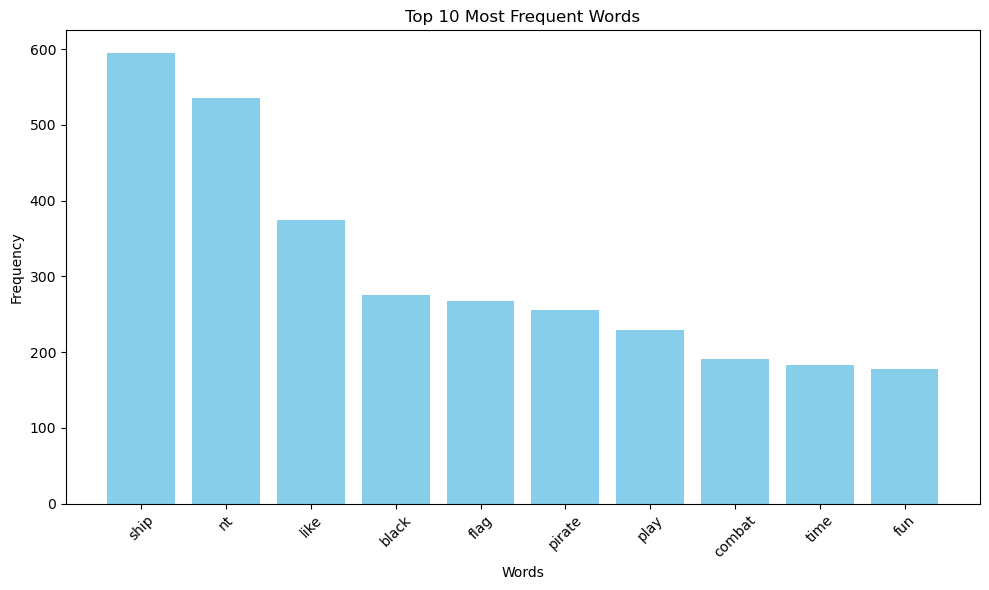

In [43]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(labels, frequencies, color='skyblue')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [44]:
############ Sentiment Analysis #######

In [45]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Download the VADER lexicon if not already downloaded
#nltk.download('vader_lexicon')

''' This version compares the neg (negative) and pos (positive) scores directly.

def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer() 
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'
'''


" This version compares the neg (negative) and pos (positive) scores directly.\n\ndef fetch_sentiment_using_SIA(text):\n    sid = SentimentIntensityAnalyzer() \n    polarity_scores = sid.polarity_scores(text)\n    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'\n"

In [46]:
### Polarity score ###
df_2.Cleaned_reviews
sid = SentimentIntensityAnalyzer()

df_2['Score'] = df_2['Review_lemma'].apply(lambda review: sid.polarity_scores(review))
df_2.head()

#compound score 
df_2['Comp_score']= df_2['Score'].apply(lambda scores: scores['compound'])
df_2.head()

,Cleaned_reviews,Review_stem,Review_lemma,Score,Comp_score
0,unbiased view player experience black flag stu...,unbias view player experi black flag stun visu...,unbiased view player experience black flag stu...,"{'neg': 0.134, 'neu': 0.649, 'pos': 0.216, 'co...",0.9631
1,never played black flag ftr thoroughly enjoy s...,never play black flag ftr thorough enjoy ship ...,never played black flag ftr thoroughly enjoy s...,"{'neg': 0.071, 'neu': 0.583, 'pos': 0.346, 'co...",0.9950
2,could id actually rate like cant ill go would ...,could id actual rate like cant ill go would ho...,could id actually rate like cant ill go would ...,"{'neg': 0.152, 'neu': 0.632, 'pos': 0.215, 'co...",0.9304
3,believe every comparison games assassin creed ...,believ everi comparison game assassin creed se...,believe every comparison game assassin creed s...,"{'neg': 0.251, 'neu': 0.617, 'pos': 0.133, 'co...",-0.9871
4,way many haters nothing make smile early kinda...,way mani hater noth make smile earli kinda slo...,way many hater nothing make smile early kinda ...,"{'neg': 0.145, 'neu': 0.644, 'pos': 0.211, 'co...",0.9020


In [47]:
#This version uses the compound score to determine sentiment. The compound score is a normalized, weighted composite score that ranges from -1 (most negative) to +1 (most positive).

def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    compound = polarity_scores['compound']
    if compound >= 0.05:
        return 'pos'
    elif compound <= -0.05:
        return 'neg'
    else:
        return 'neutral'

In [48]:
sentiments_using_SIA = df_2.Cleaned_reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())


,count
Cleaned_reviews,
pos,446
neg,209
neutral,20


In [49]:
df_2['Sentiment_SIA'] = df_2['Review_lemma'].apply(fetch_sentiment_using_SIA)

print(df_2)

                                       Cleaned_reviews  \
0    unbiased view player experience black flag stu...   
1    never played black flag ftr thoroughly enjoy s...   
2    could id actually rate like cant ill go would ...   
3    believe every comparison games assassin creed ...   
4    way many haters nothing make smile early kinda...   
..                                                 ...   
670  could much better wish would deliver type game...   
671  games good could bit longer bigger butand bugs...   
672                                 enjoyable good job   
673  boring uninspired pirate like black flag every...   
674                  good imo like everyone style play   

                                           Review_stem  \
0    unbias view player experi black flag stun visu...   
1    never play black flag ftr thorough enjoy ship ...   
2    could id actual rate like cant ill go would ho...   
3    believ everi comparison game assassin creed se...   
4    way mani

In [50]:
### Using Text Blob ###

In [51]:
from textblob import TextBlob

def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'pos'
    elif polarity < 0:
        return 'neg'
    else:
        return 'neu'

In [52]:
# Apply sentiment analysis using TextBlob
df_2['Sentiment_TextBlob'] = df_2['Review_lemma'].apply(fetch_sentiment_using_textblob)


print(df_2)

                                       Cleaned_reviews  \
0    unbiased view player experience black flag stu...   
1    never played black flag ftr thoroughly enjoy s...   
2    could id actually rate like cant ill go would ...   
3    believe every comparison games assassin creed ...   
4    way many haters nothing make smile early kinda...   
..                                                 ...   
670  could much better wish would deliver type game...   
671  games good could bit longer bigger butand bugs...   
672                                 enjoyable good job   
673  boring uninspired pirate like black flag every...   
674                  good imo like everyone style play   

                                           Review_stem  \
0    unbias view player experi black flag stun visu...   
1    never play black flag ftr thorough enjoy ship ...   
2    could id actual rate like cant ill go would ho...   
3    believ everi comparison game assassin creed se...   
4    way mani

In [53]:
#Visualization #

In [54]:
#lets us consider SentimentIntensityAnalyzer only 

df_3 = pd.DataFrame()
df_3 = df_2[['Review_lemma', 'Sentiment_SIA', 'Sentiment_TextBlob']]

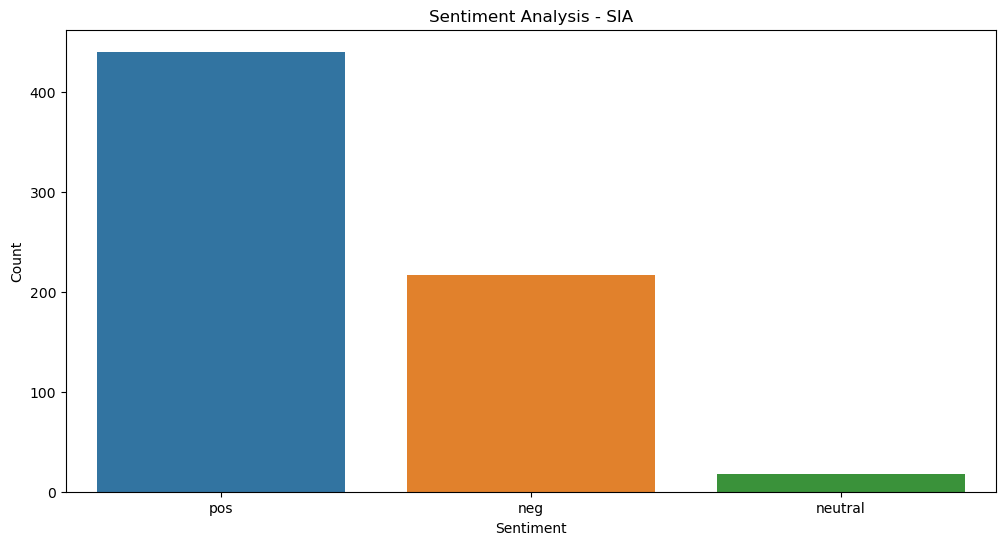

In [55]:
### Bar plot for sentiment ###
import seaborn as sns
plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment_SIA', data=df_3)
plt.title('Sentiment Analysis - SIA')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

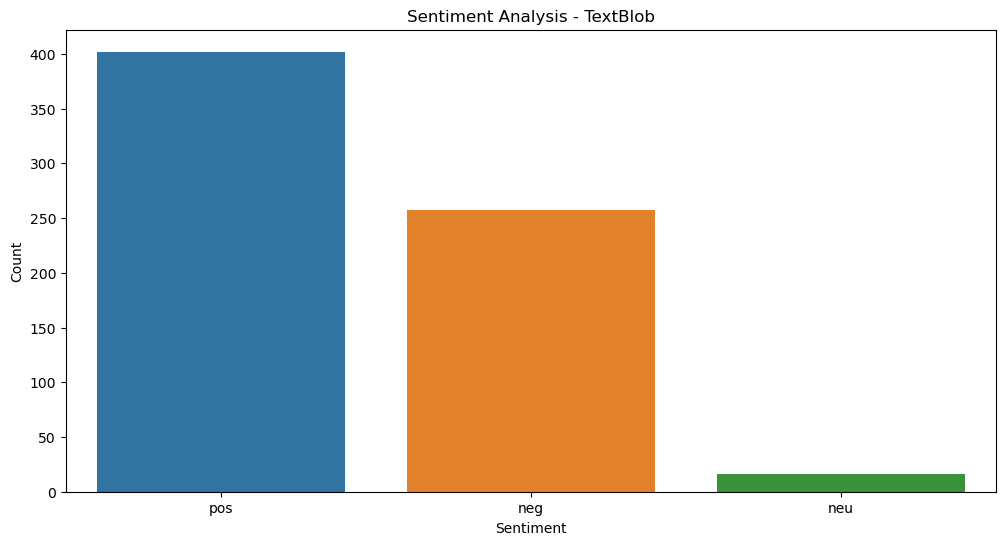

In [56]:
### Bar plot for sentiment ###
import seaborn as sns
plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment_TextBlob', data=df_3)
plt.title('Sentiment Analysis - TextBlob')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [57]:
# Hence we see there is positive ematin fro players side, but we should alos note that, comparativly there is no big differnce between positve and negative sentiments among the layers. 

In [58]:
# Seprate positive and negative reviews
df_POS = pd.DataFrame()
df_POS['Positive_Review'] = df_3.apply(lambda row : row['Review_lemma'] if row['Sentiment_SIA'] == 'pos' else ' ', axis=1)

df_NEG = pd.DataFrame()
df_NEG['Negative_Review'] = df_3.apply(lambda row : row['Review_lemma'] if row['Sentiment_SIA'] == 'neg' else '', axis=1)


In [59]:
def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text).strip()

# Apply this function to your DataFrame column
df_POS['Positive_Review'] = df_POS['Positive_Review'].apply(remove_extra_spaces)

# Apply this function to your DataFrame column
df_NEG['Negative_Review'] = df_NEG['Negative_Review'].apply(remove_extra_spaces)

In [60]:
### Plot top postive word ##
pos_text = ' '.join(df_POS['Positive_Review'])
pos_text

'unbiased view player experience black flag stunning visuals easy handling ship much explore rank rise thing unlock upgrade half mmo grind standard yearslong character based mmos captivating offer load fun pirate loving explorer enjoys decent storyline potential growth customizations extended content indepth ship battlesmissions current state offer hour upon hour enjoyable gameplay freetoexplore open sea ship vary size style designed playstyles ramming fire explosion etc various type weapon interchangeable design including ethereal weapon fight ghost ship one main social hub sainte anne option stop adventure various campsoutposts store item save progress follow storyline rise rank build glorious battle ship buyselltrade job board bounty board crafting station side mission coin reward plunder ship site map farm material ship plunder ship wreck pick free booty sea left behind player npc run hidden business extra coin join server event wreak havoc various npc clan camp take notorious pira

In [74]:
doc_pos = nlp(pos_text)

pos_words = [token.text.lower() for token in doc_pos if not token.is_stop and not token.is_punct]

pos_word_freq = Counter(pos_words)

Top_pos_words = pos_word_freq.most_common(10)

Top_pos_words

[('ship', 406),
 ('nt', 350),
 ('like', 284),
 ('black', 192),
 ('flag', 184),
 ('play', 179),
 ('pirate', 176),
 ('fun', 155),
 ('game', 121),
 ('time', 121)]

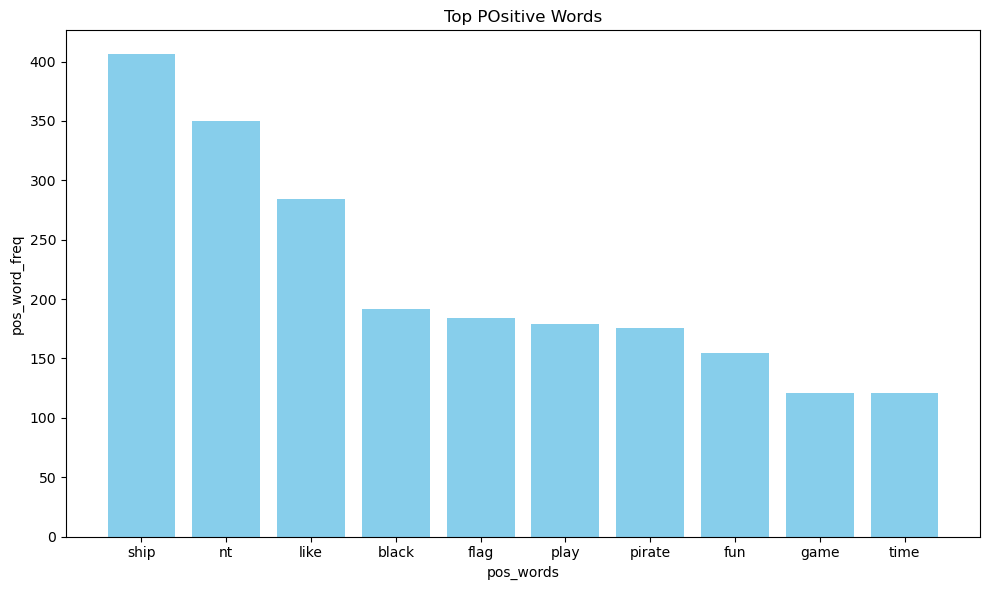

In [62]:
labels, frequencies = zip(*Top_pos_words)
plt.figure(figsize=(10, 6))
plt.bar(labels, frequencies, color = 'skyblue')
plt.title('Top POsitive Words')
plt.xlabel('pos_words')
plt.ylabel('pos_word_freq')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

In [63]:
### Plot top Negative word ###

neg_text = ' '.join(df_NEG['Negative_Review'])
neg_text

'   believe every comparison game assassin creed sea thief even world warcraft doesnt make sheer expansive world sail high sea see part gaming adventure take everything gamer know turn task well either become builder destroyer fortune exploration open new thrilling story cant appeal maddening amount hater take huddle corner gaming tent bash swashbuckler every bad nookie nothing first place bad cant come kick boot rating meter know refereeing small mass decide ruin game chance perceived well ive world faced allot hate rebel level monger camper ramper head player born pull stunt faced weird mindset think z gen garbage pug nightmare get involved attitude towards ranking game bad ill blown back player backyard like mortar delight im fool test might survival instinct thats missing skill many player dont want play value cheater modders like hyped beast gym think nobody top muscle freak even freak topped lonely top scary hell top got story go give star going see even get close pirate even gam

In [64]:
# Remove extra spaces
neg_text = re.sub(r'\s+', ' ', neg_text)

print(neg_text)

 believe every comparison game assassin creed sea thief even world warcraft doesnt make sheer expansive world sail high sea see part gaming adventure take everything gamer know turn task well either become builder destroyer fortune exploration open new thrilling story cant appeal maddening amount hater take huddle corner gaming tent bash swashbuckler every bad nookie nothing first place bad cant come kick boot rating meter know refereeing small mass decide ruin game chance perceived well ive world faced allot hate rebel level monger camper ramper head player born pull stunt faced weird mindset think z gen garbage pug nightmare get involved attitude towards ranking game bad ill blown back player backyard like mortar delight im fool test might survival instinct thats missing skill many player dont want play value cheater modders like hyped beast gym think nobody top muscle freak even freak topped lonely top scary hell top got story go give star going see even get close pirate even gaming

In [65]:
doc_neg = nlp(neg_text)

neg_words = [token.text.lower() for token in doc_neg if not token.is_stop and not token.is_punct]

neg_word_freq = Counter(neg_words)

Top_neg_words = neg_word_freq.most_common(10)

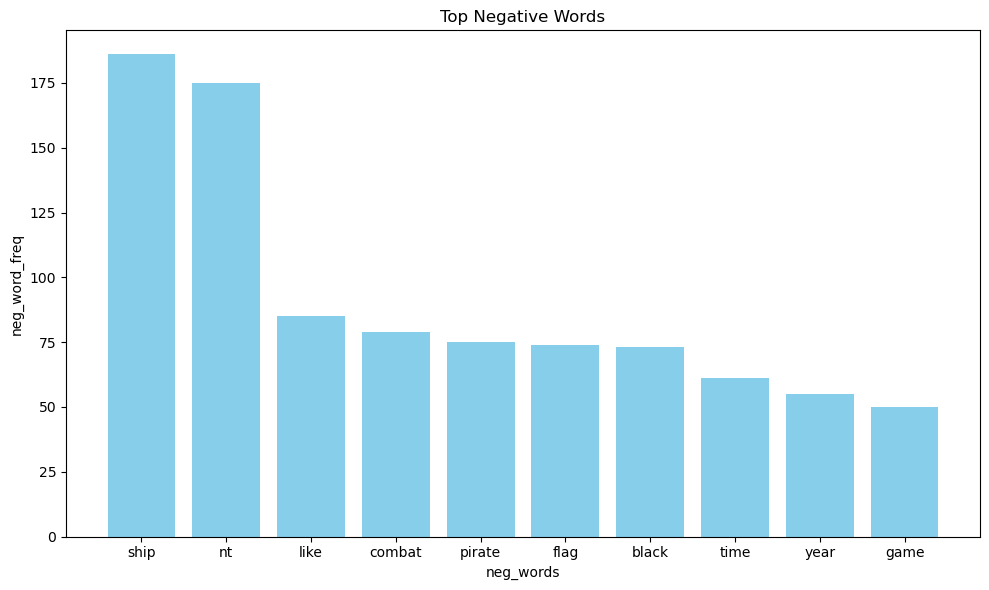

In [66]:
labels, frequencies = zip(*Top_neg_words)
plt.figure(figsize=(10, 6))
plt.bar(labels, frequencies, color = 'skyblue')
plt.title('Top Negative Words')
plt.xlabel('neg_words')
plt.ylabel('neg_word_freq')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()


In [67]:
Top_neg_words 

[('ship', 186),
 ('nt', 175),
 ('like', 85),
 ('combat', 79),
 ('pirate', 75),
 ('flag', 74),
 ('black', 73),
 ('time', 61),
 ('year', 55),
 ('game', 50)]

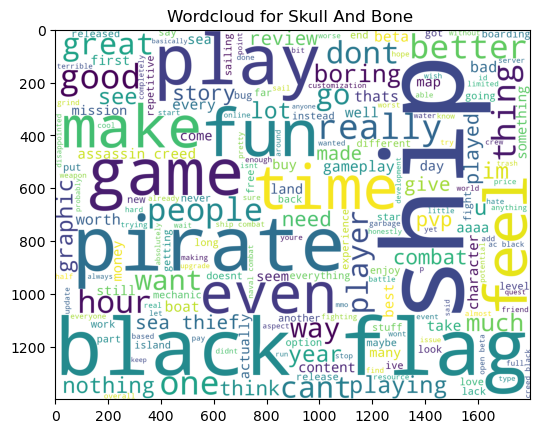

In [68]:
### Word Cloud ###

wordcloud_pos = WordCloud(background_color='white',  width = 1800, height=1400). generate(Reviews_2)
plt.figure(2)
plt.title('Wordcloud for Skull And Bone ')
plt.imshow(wordcloud_pos)

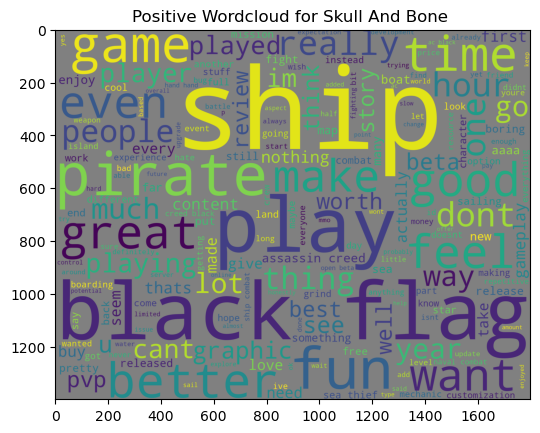

In [69]:
##### Positive wordcloud ######

wordcloud_pos = WordCloud(background_color='grey',  width = 1800, height=1400). generate(pos_text)
plt.figure(2)
plt.title('Positive Wordcloud for Skull And Bone ')
plt.imshow(wordcloud_pos)


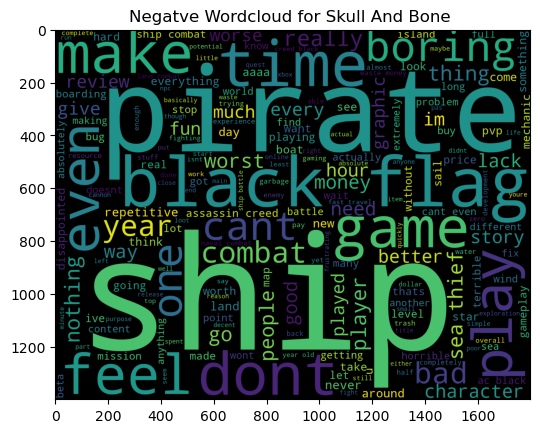

In [70]:
### Negative Word CLoud ###

wordcloud_pos = WordCloud(background_color='black',  width = 1800, height=1400). generate(neg_text)
plt.figure(2)
plt.title('Negatve Wordcloud for Skull And Bone ')
plt.imshow(wordcloud_pos)